#this EDA is done in python enviroment

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import seaborn as sns
import re

In [106]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [108]:
pd.options.display.float_format = '{:,.2f}'.format

In [109]:
pd.set_option('display.max_columns',500)

In [110]:
# Data sourcing

In [111]:
loan_df =  pd.read_csv('lending_club_loans.csv',dtype = 'object')

In [112]:
print('Number of Rows and columns are', loan_df.shape)

Number of Rows and columns are (42542, 115)


In [113]:
#display the first 5 Rows
loan_df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,735,739,1,NaN,NaN,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,NaN,Sep-16,744,740,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1,0,Apr-99,740,744,5,NaN,NaN,3,0,1687,9.40%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,NaN,Sep-16,499,0,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,735,739,2,NaN,NaN,2,0,2956,98.50%,10,f,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,NaN,Sep-16,719,715,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20,0,Feb-96,690,694,1,35,NaN,10,0,5598,21%,37,f,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,NaN,Apr-16,604,600,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [114]:
# get the information about the data 
loan_df.info(verbose=True,null_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42542 entries, 0 to 42541
Data columns (total 115 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    id                              42538 non-null  object
 1    member_id                       42535 non-null  object
 2    loan_amnt                       42535 non-null  object
 3    funded_amnt                     42535 non-null  object
 4    funded_amnt_inv                 42535 non-null  object
 5    term                            42535 non-null  object
 6    int_rate                        42535 non-null  object
 7    installment                     42535 non-null  object
 8    grade                           42535 non-null  object
 9    sub_grade                       42535 non-null  object
 10   emp_title                       39909 non-null  object
 11   emp_length                      41423 non-null  object
 12   home_ownership                

<ipython-input-114-84ffb9e12da8>:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  loan_df.info(verbose=True,null_counts= True)


columns with null value more than 30% = 58 columns


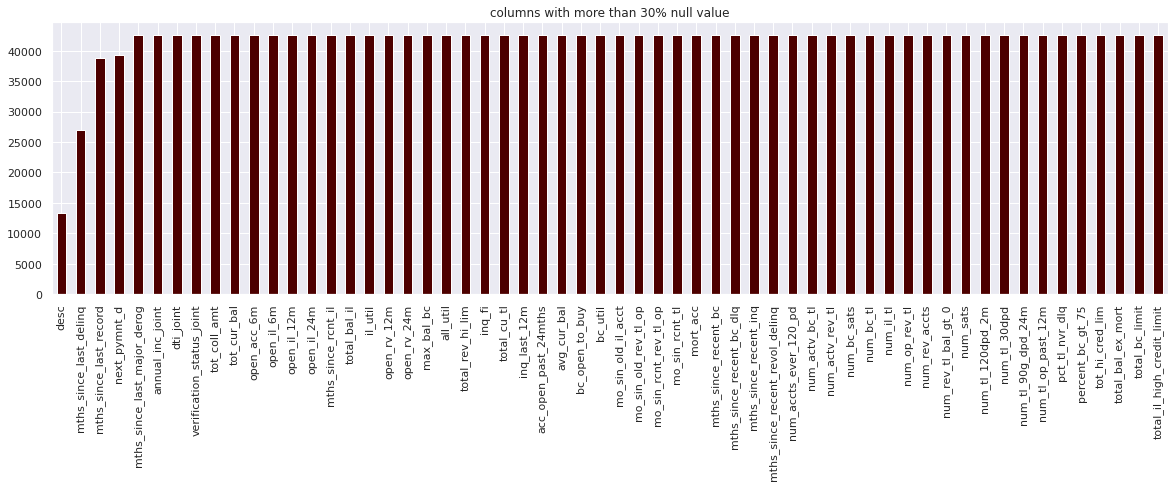

In [115]:
# columns with null < 30%
Na_col = loan_df.isnull().sum()
Na_col = Na_col[Na_col.values > (0.3 * len(loan_df))]
print('columns with null value more than 30% =',str(Na_col.count()),'columns')
plt.figure(figsize=(20,5))
Na_col.plot(kind='bar',color='#4d0000')
plt.title('columns with more than 30% null value')
plt.show()

In [116]:
# there are 54 columns with entirely null values and 4 columns with more then 30% null values

#Data cleaning

In [118]:
def removeNull (dataframe , axis = 1 , percent = 0.3):
    df = dataframe.copy()
    print('number of rows and columns',df.shape)
    if axis == 0 :
        rownames = df.transpose().isnull().sum()
        rownames = list(rownames[rownames.values > percent * len(df)].index)
        df.drop(df.index[rownames],inplace = True)
        print('number of rows have been droped is: ',len(rownames))
        
    else:
        colnames = (df.isnull().sum() / len(df))
        colnames = list(colnames[colnames.values >= percent].index)
        df.drop(labels = colnames,axis = 1, inplace = True)
        print('number of columns have been droped is: ',len(colnames))
    print('output dataframe rows and columns are :', df.shape)
    
    return df


In [119]:
# remove the null columes with 30% null values or more

loan_df = removeNull(loan_df)

number of rows and columns (42542, 115)
number of columns have been droped is:  58
output dataframe rows and columns are : (42542, 57)


In [120]:
loan_df = removeNull(loan_df, axis = 0)

number of rows and columns (42542, 57)
number of rows have been droped is:  0
output dataframe rows and columns are : (42542, 57)


In [121]:
loan_df.nunique()

id                            42538
member_id                     42535
loan_amnt                       898
funded_amnt                    1051
funded_amnt_inv                9240
term                              2
int_rate                        394
installment                   16459
grade                             7
sub_grade                        35
emp_title                     30658
emp_length                       11
home_ownership                    5
annual_inc                     5597
verification_status               3
issue_d                          55
loan_status                       9
pymnt_plan                        2
url                           42535
purpose                          14
title                         21256
zip_code                        837
addr_state                       50
dti                            2894
delinq_2yrs                      12
earliest_cr_line                530
fico_range_low                   44
fico_range_high             

In [122]:
# drope all columns with unique value equal to 1 since it will not effect the analysis

In [123]:
unique = loan_df.nunique()
unique = list(unique[unique == 1].index)
print('old data set rows and columns are:', loan_df.shape)

loan_df.drop(labels = unique , axis = 1 , inplace = True)
print('new data set rows and columns are:', loan_df.shape)

old data set rows and columns are: (42542, 57)
new data set rows and columns are: (42542, 52)


In [124]:
# the percentage of null value in each colmns
print(((loan_df.isnull().sum() / len(loan_df))*100))

id                        0.01
member_id                 0.02
loan_amnt                 0.02
funded_amnt               0.02
funded_amnt_inv           0.02
term                      0.02
int_rate                  0.02
installment               0.02
grade                     0.02
sub_grade                 0.02
emp_title                 6.19
emp_length                2.63
home_ownership            0.02
annual_inc                0.03
verification_status       0.02
issue_d                   0.02
loan_status               0.02
pymnt_plan                0.02
url                       0.02
purpose                   0.02
title                     0.05
zip_code                  0.02
addr_state                0.02
dti                       0.02
delinq_2yrs               0.08
earliest_cr_line          0.08
fico_range_low            0.02
fico_range_high           0.02
inq_last_6mths            0.08
open_acc                  0.08
pub_rec                   0.08
revol_bal                 0.02
revol_ut

In [125]:
loan_df.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [126]:
# replace the nan values with zero
loan_df.emp_length.fillna('0', inplace = True)
emp_length_order = ["0", "< 1 year", "1 year", "2 years", "3 years",  "4 years", "5 years", "6 years", "7 years","8 years", "9 years",  "10+ years"]
loan_df['emp_length'] = pd.Categorical(loan_df['emp_length'],categories= emp_length_order , ordered= True)

loan_df.emp_length.unique()

['10+ years', '< 1 year', '1 year', '3 years', '8 years', ..., '5 years', '6 years', '2 years', '7 years', '0']
Length: 12
Categories (12, object): ['0' < '< 1 year' < '1 year' < '2 years' ... '7 years' < '8 years' <
                          '9 years' < '10+ years']

In [127]:
loan_df.nunique()

id                         42538
member_id                  42535
loan_amnt                    898
funded_amnt                 1051
funded_amnt_inv             9240
term                           2
int_rate                     394
installment                16459
grade                          7
sub_grade                     35
emp_title                  30658
emp_length                    12
home_ownership                 5
annual_inc                  5597
verification_status            3
issue_d                       55
loan_status                    9
pymnt_plan                     2
url                        42535
purpose                       14
title                      21256
zip_code                     837
addr_state                    50
dti                         2894
delinq_2yrs                   12
earliest_cr_line             530
fico_range_low                44
fico_range_high               44
inq_last_6mths                28
open_acc                      44
pub_rec   

In [128]:
#business driven drop all columns not required for the analysis

In [129]:
not_required_col = ["id","member_id","url"]
loan_df.drop(labels = not_required_col , axis = 1 , inplace = True)
print('data set rows and columns are :', loan_df.shape)

data set rows and columns are : (42542, 49)


In [130]:
# formating alll numeric columns 
numeric_columns = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','annual_inc','dti']

loan_df[numeric_columns] = loan_df[numeric_columns].apply(pd.to_numeric)


In [131]:
loan_df[numeric_columns].dtypes

loan_amnt          float64
funded_amnt        float64
funded_amnt_inv    float64
installment        float64
annual_inc         float64
dti                float64
dtype: object

In [132]:
loan_df.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,"5,000.00","5,000.00","4,975.00",36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,"24,000.00",Verified,Dec-11,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,735,739,1,3,0,13648,83.70%,9,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,Sep-16,744,740,0,0,0,0
1,"2,500.00","2,500.00","2,500.00",60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,1.00,0,Apr-99,740,744,5,3,0,1687,9.40%,4,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,Sep-16,499,0,0,0,0,0


In [133]:
# remove the the percent from int_rate 

In [134]:
loan_df['int_rate'] = loan_df['int_rate'].str.rstrip('%').astype('float')

In [135]:
# check diffrent catogories percentage for loan purpose 
loan_df.purpose.value_counts()/len(loan_df)*100

debt_consolidation   46.49
credit_card          12.87
other                10.40
home_improvement      7.52
major_purchase        5.43
small_business        4.68
car                   3.80
wedding               2.36
medical               1.77
moving                1.48
house                 1.00
educational           0.99
vacation              0.94
renewable_energy      0.25
Name: purpose, dtype: float64

In [136]:
# Drop loan purpose index other or less than 0.75%
delt_loan_purpose = loan_df.purpose.value_counts()/len(loan_df)*100
delt_loan_purpose = delt_loan_purpose[((delt_loan_purpose < 0.75) | (delt_loan_purpose.index == 'other'))]
loan_df.drop(labels= loan_df[loan_df.purpose.isin(delt_loan_purpose.index)].index, inplace = True)


In [137]:
loan_df.purpose.unique()

array(['credit_card', 'car', 'small_business', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'educational', nan],
      dtype=object)

In [138]:
# check diffrent catogories percentage for loan status 
loan_df.loan_status.value_counts()/len(loan_df)*100

Fully Paid                                            79.45
Charged Off                                           13.15
Does not meet the credit policy. Status:Fully Paid     4.43
Does not meet the credit policy. Status:Charged Off    1.68
Current                                                1.19
In Grace Period                                        0.04
Late (31-120 days)                                     0.03
Late (16-30 days)                                      0.01
Default                                                0.00
Name: loan_status, dtype: float64

In [139]:
#bussiness driven - loan amount to annual income ratio
loan_df['loan_ratio'] = loan_df['loan_amnt'] / loan_df['annual_inc']

In [140]:
# type driven - extract month and year from issue-date
loan_df['issue_month'],loan_df['issue_year'] = loan_df['issue_d'].str.split('-',1).str

<ipython-input-140-2e47609c0447>:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  loan_df['issue_month'],loan_df['issue_year'] = loan_df['issue_d'].str.split('-',1).str


In [141]:
loan_df[['issue_d','issue_month','issue_year']].head()

,issue_d,issue_month,issue_year
0,Dec-11,Dec,11
1,Dec-11,Dec,11
2,Dec-11,Dec,11
5,Dec-11,Dec,11
6,Dec-11,Dec,11


In [142]:
# set the months order
months_order = ["Jan", "Feb", "Mar", "Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
loan_df['issue_month'] = pd.Categorical(loan_df['issue_month'],categories= months_order, ordered= True)

#visualization

In [144]:
loan_df.dropna(subset= ['loan_amnt'],axis=0, how='all',inplace =True)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


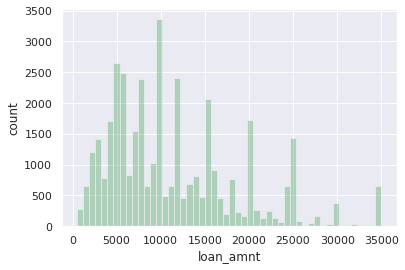

In [145]:
sns.distplot(loan_df['loan_amnt'],kde= False, color = 'g')
sns.set_style('darkgrid')
plt.ylabel('count')
plt.show()

In [146]:
bins = [0 , 5000 , 10000 , 15000 , 20000 , 25000 , 40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
loan_df['loan_amnt_range'] = pd.cut(loan_df['loan_amnt'] , bins , labels= slot)


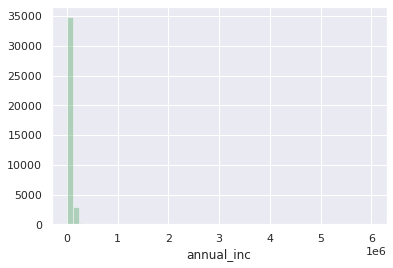

In [147]:
sns.distplot(loan_df['annual_inc'] , kde= False , color = 'g')


(-100.0, 1000000.0)

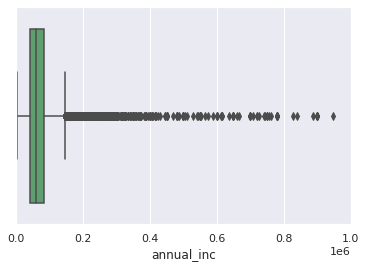

In [148]:
from scipy.stats import alpha
sns.boxplot(data= loan_df , x = 'annual_inc', color = 'g')
plt.xlim(-100,1000000)

In [149]:
# Type Driven - Create Bins (Categorical Vriable) for range of Annual Income
bins = [0, 25000, 50000, 75000, 100000,1000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
loan_df['annual_inc_range'] = pd.cut(loan_df['annual_inc'], bins, labels=slot)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


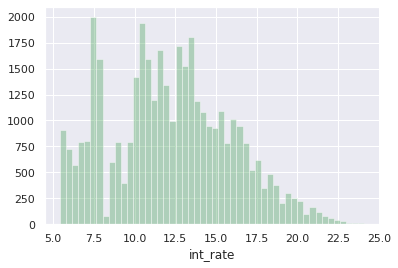

In [150]:
sns.distplot(loan_df['int_rate'],kde= False , color = 'g')

In [151]:
# Type Driven - Create Bins (Categorical Vriable) for range of Interest rate
bins = [0, 7.5, 10, 12.5, 15,20]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
loan_df['int_rate_range'] = pd.cut(loan_df['int_rate'], bins, labels=slot)

# univariate analysis

In [206]:
def univariate_analyze (df , col , vartype , hue = None):
    sns.set(style= 'darkgrid')
    
    if vartype == 0 :
        fig , ax = plt.subplots(nrows = 1 , ncols = 3 , figsize = (20,8))
        ax[0].set_title('Distribution Plot')
        sns.distplot(df[col] , ax = ax[0] , kde =True  , color = 'g')
        ax[1].set_title('Violin Plot')
        sns.violinplot(data= df , x= col , ax= ax[1] , inner= 'quartile'  , color = 'g')
        ax[2].set_title('box plot')
        sns.boxplot(data= df , x= col , ax= ax[2]  , color = 'g')
        
    if vartype == 1:
        temp = pd.Series(data=hue , dtype=pd.StringDtype())
        fig , ax =  plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width,7)
        ax = sns.countplot(data= df, x =col ,order= df[col].value_counts().index , hue= hue )
        plt.xticks(rotation = 90)
        plt.legend(loc ='upper right')
        
        del temp
    else:
        exit
    plt.show()

In [154]:
#continous variables
loan_df.describe(percentiles= [0.05,0.1,0.25,0.30,0.50,0.60,0.75,0.80,0.90,0.95,0.99])

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,loan_ratio
count,"38,004.00","38,004.00","38,004.00","38,004.00","38,004.00","38,004.00","38,004.00","38,004.00"
mean,"11,463.40","11,183.98","10,497.00",12.19,333.03,"69,700.20",13.49,0.19
std,"7,440.00","7,173.51","7,171.24",3.72,209.68,"64,854.89",6.69,0.12
min,500.00,500.00,0.00,5.42,15.67,"1,896.00",0.00,0.00
5%,"2,500.00","2,500.00","1,750.00",6.39,77.76,"24,000.00",2.26,0.04
10%,"3,500.00","3,500.00","2,850.00",7.19,105.56,"30,000.00",4.26,0.06
25%,"6,000.00","5,775.00","5,000.00",9.63,173.24,"41,143.20",8.38,0.10
30%,"6,300.00","6,125.00","5,916.19",10.25,194.65,"45,000.00",9.49,0.11
50%,"10,000.00","10,000.00","9,000.00",11.99,291.38,"60,000.00",13.57,0.17
60%,"12,000.00","12,000.00","10,600.00",13.11,338.93,"66,600.00",15.55,0.20


In [155]:
loan_df.loan_amnt.describe()

count   38,004.00
mean    11,463.40
std      7,440.00
min        500.00
25%      6,000.00
50%     10,000.00
75%     15,000.00
max     35,000.00
Name: loan_amnt, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


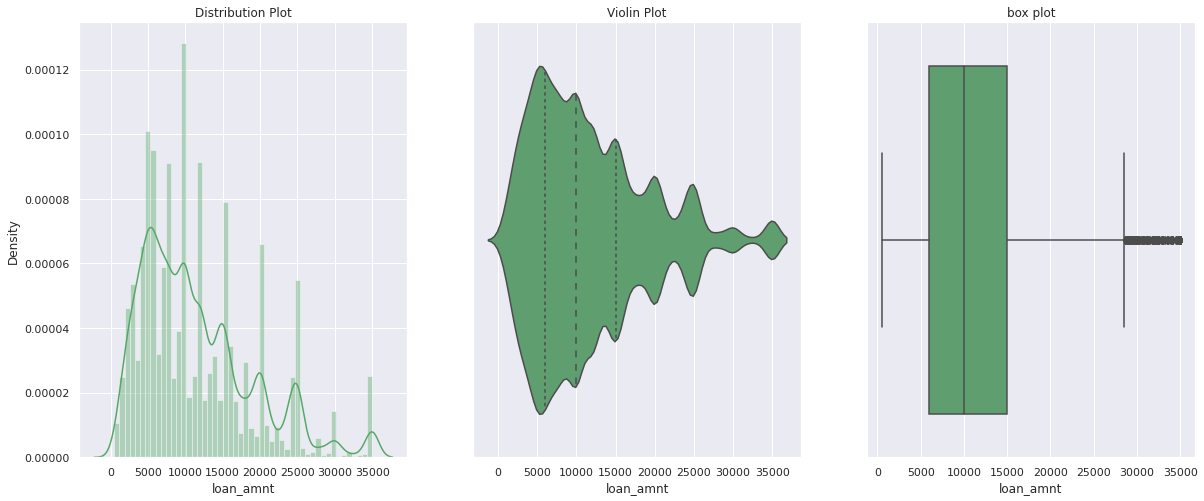

In [156]:
univariate_analyze(loan_df, 'loan_amnt' , 0)

In [157]:
loan_df.int_rate.describe()

count   38,004.00
mean        12.19
std          3.72
min          5.42
25%          9.63
50%         11.99
75%         14.79
max         24.11
Name: int_rate, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


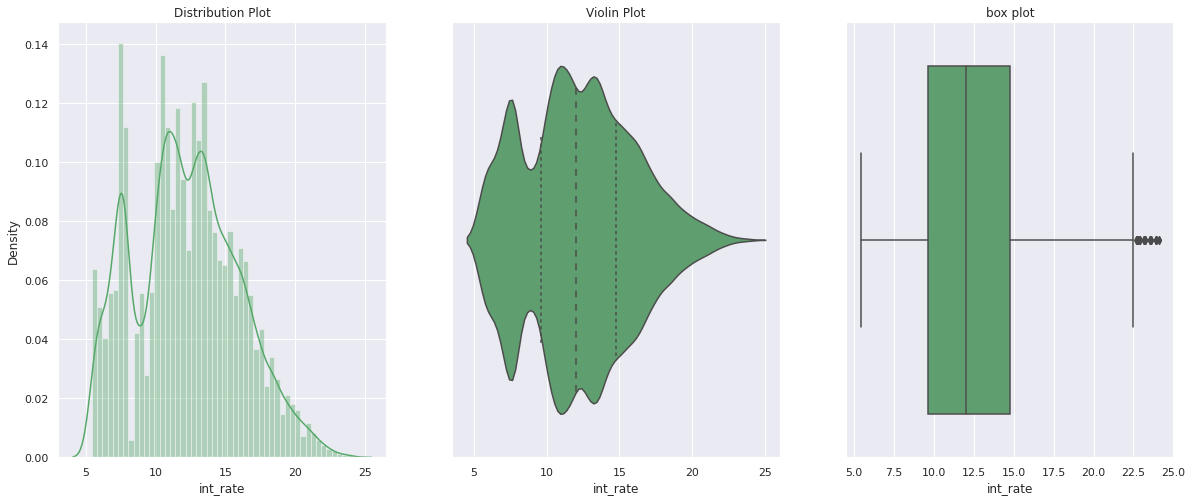

In [158]:
univariate_analyze(loan_df,'int_rate',0)

In [159]:
loan_df['annual_inc'].describe(percentiles= [0.05,0.1,0.25,0.30,0.50,0.60,0.75,0.80,0.90,0.95,0.99])

count      38,004.00
mean       69,700.20
std        64,854.89
min         1,896.00
5%         24,000.00
10%        30,000.00
25%        41,143.20
30%        45,000.00
50%        60,000.00
60%        66,600.00
75%        83,200.00
80%        90,000.00
90%       118,000.00
95%       144,936.60
99%       241,840.77
max     6,000,000.00
Name: annual_inc, dtype: float64

In [160]:
# Outlier is after 99 percentile. 6,000,000 which is approx 86 times more than mean value
# Remove from 99 percentile onwards

outlier = loan_df['annual_inc'].quantile(0.99)
loan_df = loan_df[loan_df['annual_inc'] <= outlier ]
loan_df['annual_inc'].describe()

count    37,623.00
mean     66,175.29
std      35,674.14
min       1,896.00
25%      41,000.00
50%      59,484.00
75%      82,000.00
max     240,734.00
Name: annual_inc, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


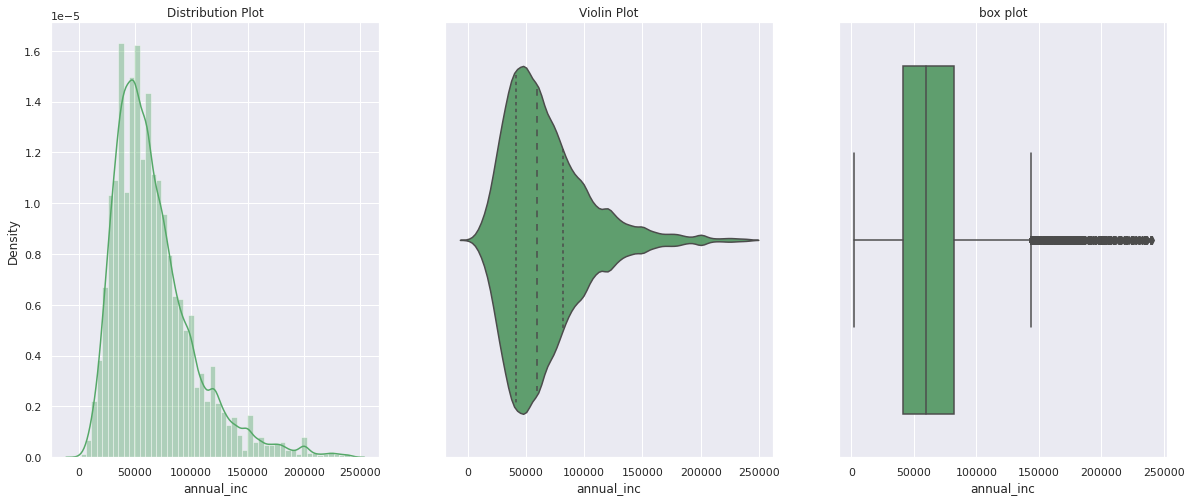

In [161]:
univariate_analyze(loan_df,'annual_inc',0)

In [162]:
#categorical variables

In [163]:
display(loan_df.groupby('loan_status').count().loan_amnt/len(loan_df.loan_status))

loan_status
Charged Off                                           0.13
Current                                               0.01
Default                                               0.00
Does not meet the credit policy. Status:Charged Off   0.02
Does not meet the credit policy. Status:Fully Paid    0.04
Fully Paid                                            0.79
In Grace Period                                       0.00
Late (16-30 days)                                     0.00
Late (31-120 days)                                    0.00
Name: loan_amnt, dtype: float64

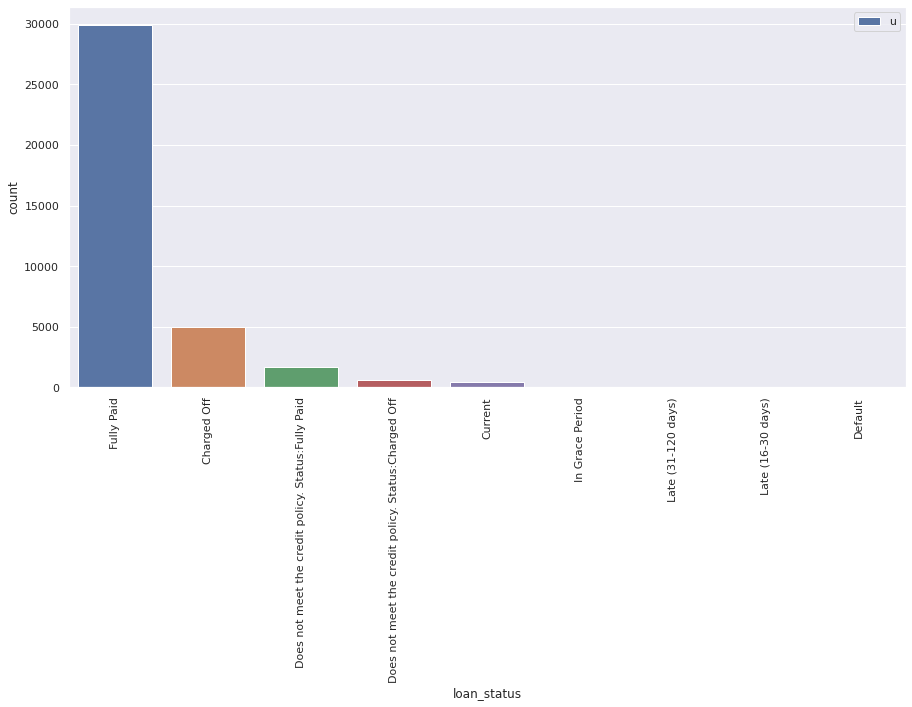

In [164]:
univariate_analyze(loan_df,'loan_status', 1)

In [165]:
display(loan_df.groupby('purpose').count().loan_amnt/len(loan_df.purpose))

purpose
car                  0.04
credit_card          0.14
debt_consolidation   0.52
educational          0.01
home_improvement     0.08
house                0.01
major_purchase       0.06
medical              0.02
moving               0.02
small_business       0.05
vacation             0.01
wedding              0.03
Name: loan_amnt, dtype: float64

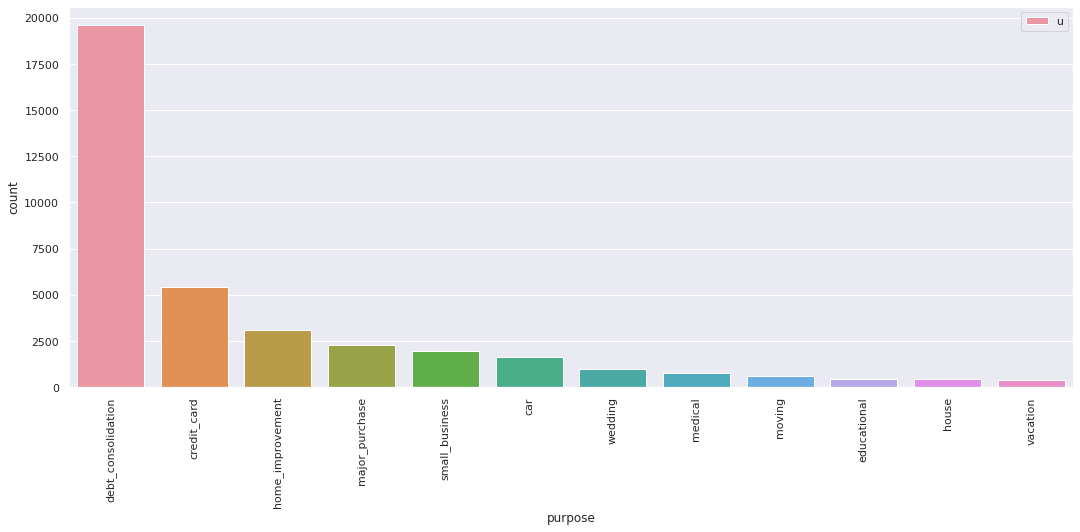

In [166]:
univariate_analyze(loan_df,'purpose',1)

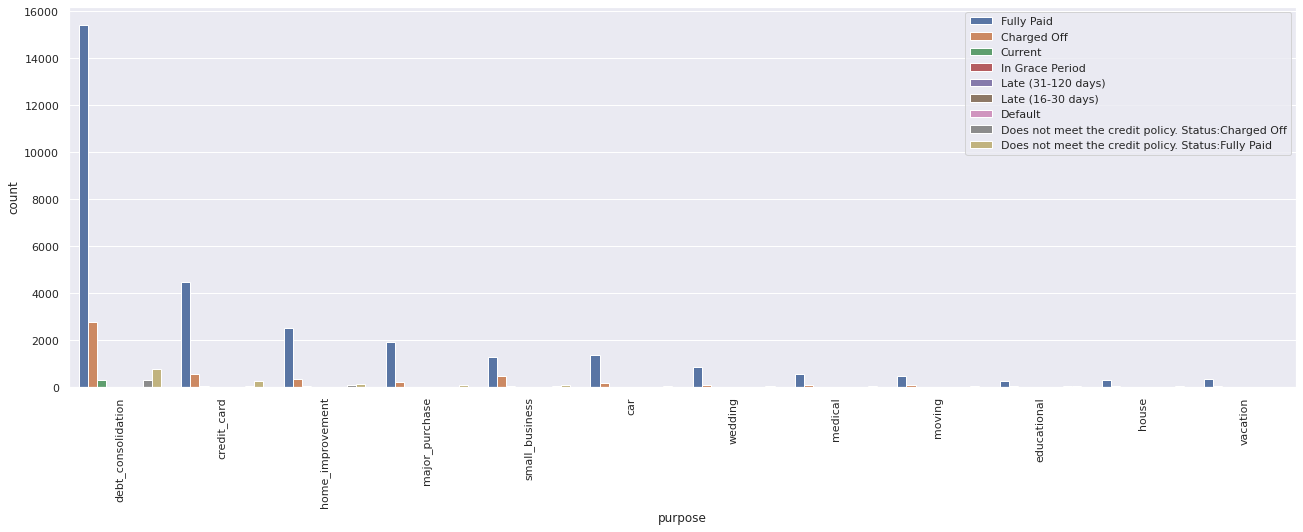

In [209]:
univariate_analyze(loan_df,'purpose',1,'loan_status')


In [168]:
loan_df.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [169]:
#remove all home titled as none , other

In [170]:
remove = ['OTHER','NONE','ANY']
loan_df.drop(loan_df[loan_df.home_ownership.isin(remove)].index, inplace=True)
loan_df.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE'], dtype=object)

In [171]:
display(loan_df.groupby('home_ownership').count().loan_amnt/len(loan_df.loan_amnt))

home_ownership
MORTGAGE   0.45
OWN        0.07
RENT       0.47
Name: loan_amnt, dtype: float64

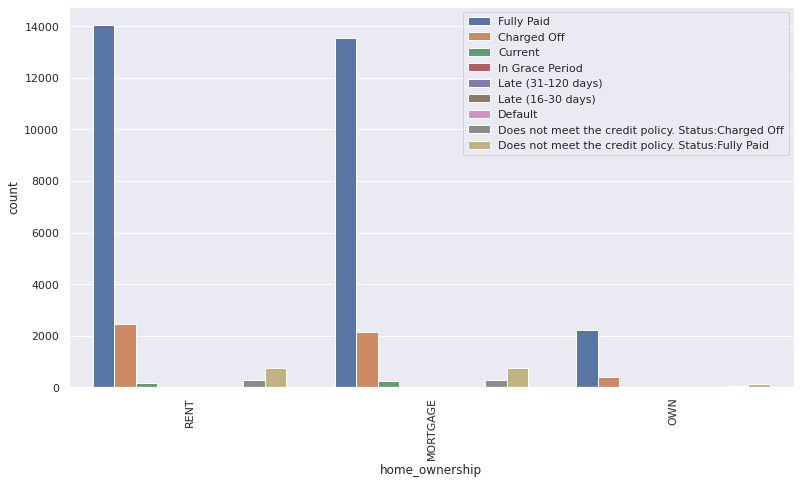

In [208]:
univariate_analyze(loan_df,'home_ownership',1,'loan_status')

In [173]:
display(loan_df.groupby('issue_year').count().loan_amnt/len(loan_df.issue_year))

issue_year
07   0.01
08   0.05
09   0.12
10   0.29
11   0.52
Name: loan_amnt, dtype: float64

In [174]:
year_wise = loan_df.groupby('issue_year')[['loan_status']].count()
year_wise.rename(columns = {'loan_status':'count'},inplace = True)

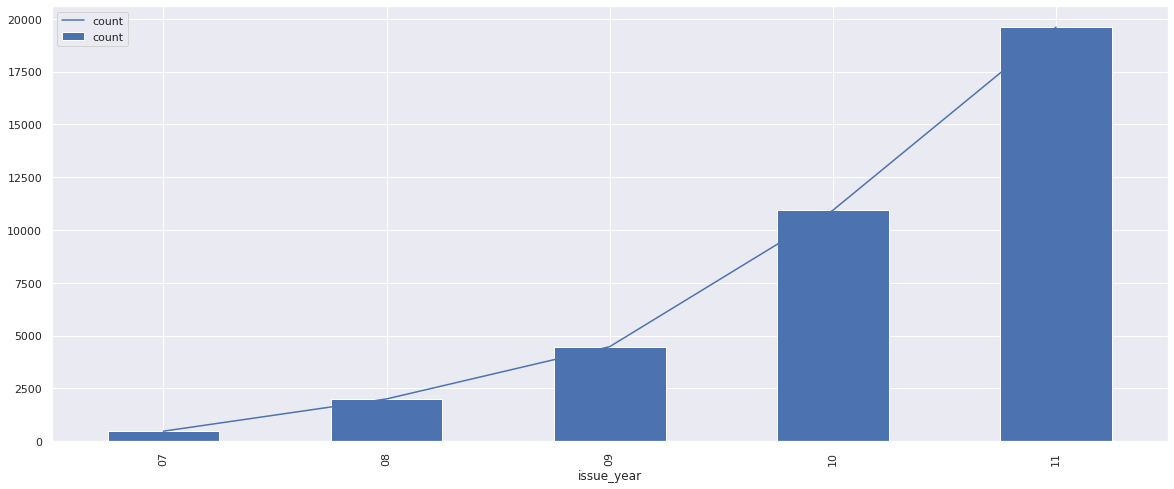

In [175]:
ax = year_wise.plot(figsize=(20,8))
year_wise.plot(kind = 'bar' , figsize = (20,8) , ax = ax)
plt.show()

In [176]:
display(loan_df.groupby('term').count().loan_amnt/len(loan_df.term))

term
 36 months   0.73
 60 months   0.27
Name: loan_amnt, dtype: float64

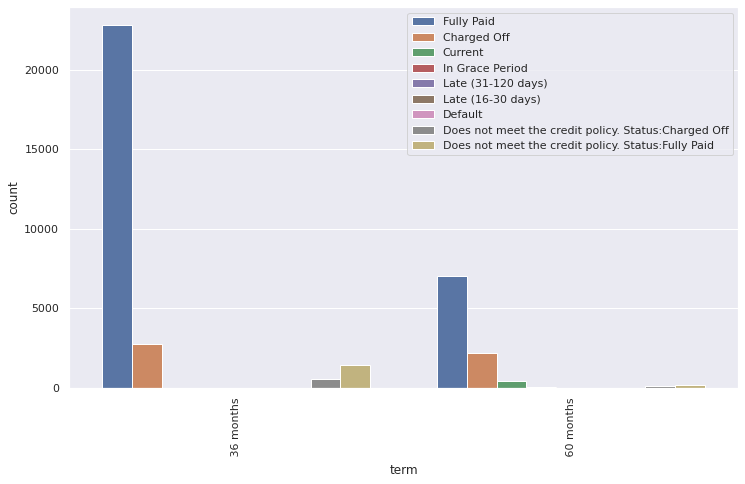

In [207]:
univariate_analyze(loan_df,'term',1,'loan_status')

In [178]:
## bivariate/multvariate analysis

In [179]:
loancopy = loan_df.copy()
loancopy = loancopy[(loancopy.loan_status == 'Fully Paid' ) | (loancopy.loan_status == 'Charged Off')]

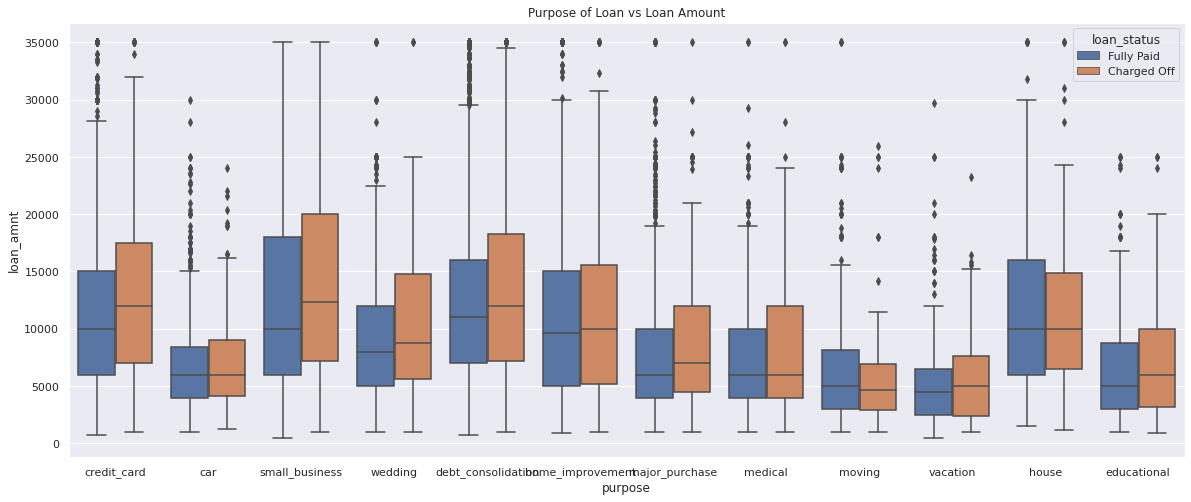

In [180]:
plt.figure(figsize = (20,8))
sns.boxplot(data = loancopy, x = 'purpose' , y = 'loan_amnt' , hue = 'loan_status')
plt.title('Purpose of Loan vs Loan Amount')
plt.show()

In [181]:
# Correlation Matrix

In [182]:
loan_correlation = loan_df.corr()
loan_correlation

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,loan_ratio
loan_amnt,1.00,0.98,0.93,0.30,0.93,0.42,0.08,0.62
funded_amnt,0.98,1.00,0.95,0.30,0.95,0.41,0.08,0.60
funded_amnt_inv,0.93,0.95,1.00,0.29,0.89,0.39,0.08,0.57
int_rate,0.30,0.30,0.29,1.00,0.28,0.08,0.12,0.21
installment,0.93,0.95,0.89,0.28,1.00,0.42,0.07,0.55
annual_inc,0.42,0.41,0.39,0.08,0.42,1.00,-0.11,-0.32
dti,0.08,0.08,0.08,0.12,0.07,-0.11,1.00,0.14
loan_ratio,0.62,0.60,0.57,0.21,0.55,-0.32,0.14,1.00


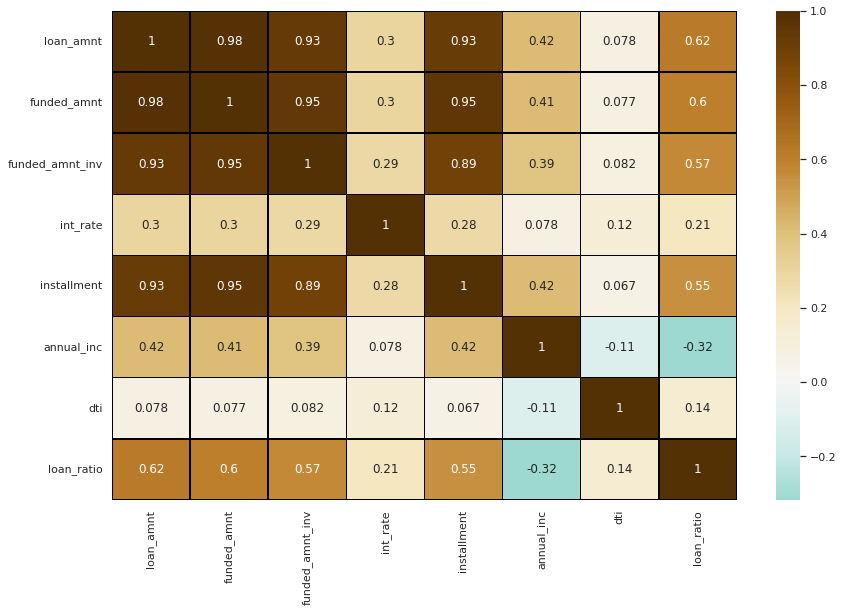

In [183]:
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(loan_correlation, annot= True,center=0 ,linecolor='black',linewidths=0.5,cmap = 'BrBG_r')
plt.show()

In [184]:
#Employment Length vs Loan Amount for each Loan Purpose

In [185]:
loanStatus = loan_df.pivot_table(index=['loan_status','purpose','emp_length'],values='loan_amnt',aggfunc=('count')).reset_index()
loanStatus = loan_df.loc[loan_df['loan_status'] == 'Charged Off']
loanStatus.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,loan_ratio,issue_month,issue_year,loan_amnt_range,annual_inc_range,int_rate_range
1,"2,500.00","2,500.00","2,500.00",60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,1.00,0,Apr-99,740,744,5,3,0,1687,9.40%,4,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,Sep-16,499,0,0,0,0,0,0.08,Dec,11,0-5000,25000-50000,15 and above
8,"5,600.00","5,600.00","5,600.00",60 months,21.28,152.39,F,F2,NaN,4 years,OWN,"40,000.00",Source Verified,Dec-11,Charged Off,n,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0,Apr-04,675,679,2,11,0,5210,32.60%,13,0,0,646.02,646.02,162.02,294.94,0,189.06,2.09,Apr-12,152.39,Sep-16,499,0,0,0,0,0,0.14,Dec,11,5000-10000,25000-50000,NaN
12,"9,000.00","9,000.00","9,000.00",36 months,13.49,305.38,C,C1,Va. Dept of Conservation/Recreation,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,n,debt_consolidation,freedom,245xx,VA,10.08,0,Apr-04,710,714,1,4,0,10452,91.70%,9,0,0,2270.7,2270.7,1256.14,570.26,0,444.3,4.16,Jul-12,305.38,Sep-16,619,615,0,0,0,0,0.30,Dec,11,5000-10000,25000-50000,12.5-15
21,"21,000.00","21,000.00","21,000.00",36 months,12.42,701.73,B,B4,Osram Sylvania,10+ years,RENT,"105,000.00",Verified,Dec-11,Charged Off,n,debt_consolidation,Debt Cleanup,335xx,FL,13.22,0,Feb-83,705,709,0,7,0,32135,90.30%,38,0,0,14025.4,14025.4,10694.96,3330.44,0,0,0,Sep-13,701.73,Sep-16,534,530,0,0,0,0,0.20,Dec,11,20000-25000,100000 and above,10-12.5
24,"6,000.00","6,000.00","6,000.00",36 months,11.71,198.46,B,B3,bmg-educational,1 year,RENT,"76,000.00",Not Verified,Dec-11,Charged Off,n,major_purchase,cash,900xx,CA,2.40,0,Jun-01,690,694,1,7,0,5963,29.70%,7,0,0,2050.14,2050.14,1305.58,475.25,0,269.31,2.57,Oct-12,198.46,Sep-16,499,0,0,0,0,0,0.08,Dec,11,5000-10000,75000-100000,10-12.5


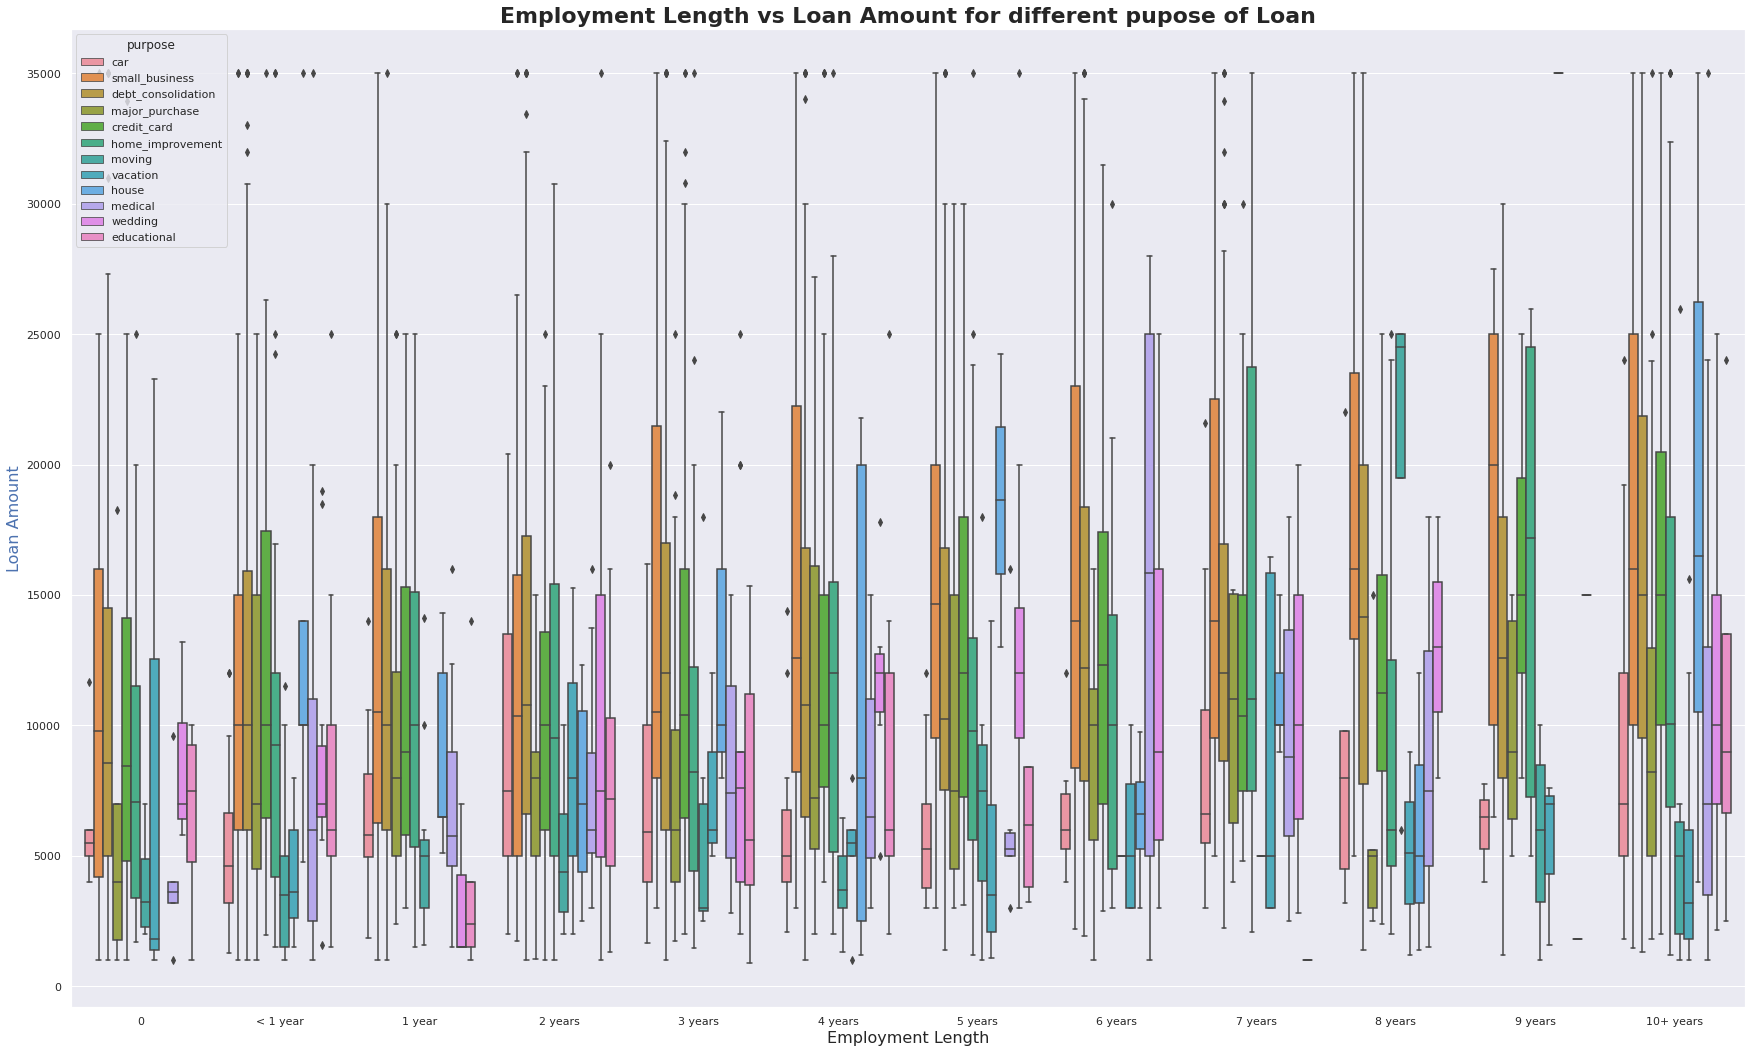

In [186]:
ax = plt.figure(figsize = (30,18))
ax = sns.boxplot(data = loanStatus , x = 'emp_length' , y = 'loan_amnt' , hue = 'purpose')
ax.set_title('Employment Length vs Loan Amount for different pupose of Loan' , fontsize = 22 , weight = 'bold')
ax.set_xlabel('Employment Length' , fontsize = 16)
ax.set_ylabel('Loan Amount' ,  color = 'b' , fontsize = 16)
plt.show()

In [187]:
#Bivariate/Multivariate Analysis for Probability of Charge off

In [188]:
def crosstab (dataframe,col):
    crosstab = pd.crosstab(dataframe[col], dataframe['loan_status'],margins= True)
    crosstab['Probability_Charged Off'] = round( (crosstab['Charged Off']/(crosstab['Charged Off'] + crosstab['Fully Paid']))  ,2)
    
    return crosstab

In [189]:
def bivariateProbability(dataframe, col, stacked= True):
    
    plotCrosstab = crosstab(dataframe,col)
    plotCrosstab.drop(['All'] , inplace =True,axis = 0)
    linePlot = plotCrosstab['Probability_Charged Off']
    
    # Drop Current loans as outcome is not known
    
    plotCrosstabx = plotCrosstab[['Charged Off','Fully Paid']]
    
    barplot = plotCrosstabx.iloc[:,0:2]
    
    ax = linePlot.plot(figsize = (20,8) , marker ='o' , color = 'b')
    ax2 = barplot.plot(kind = 'bar' , ax = ax , rot = 1 , secondary_y =True , stacked = stacked)
    ax.set_title(dataframe[col].name.title()+' vs Probability Charge Off',fontsize=20,weight="bold")
    ax.set_xlabel(dataframe[col].name.title(),fontsize=14)
    ax.set_ylabel('Probability of Charged off',color = 'b',fontsize=14)
    
    ax2.set_ylabel('Number of Applicants',color = 'g',fontsize=14)
    plt.show()

In [190]:
#Location vs Probability Charge Off

In [191]:
# drop states less than 15
filter_states = loan_df.addr_state.value_counts()
filter_states = filter_states[(filter_states < 15)]

loan_filter_states = loan_df.drop(labels = loan_df[loan_df.addr_state.isin(filter_states.index)].index)

loan_status,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days),All,Probability_Charged Off
addr_state,,,,,,,,,,,
AK,14,1,1,1,3,57,0,0,0,77,0.20
AL,49,9,0,6,17,354,0,0,0,435,0.12
AR,23,3,0,3,6,198,0,0,0,233,0.10
AZ,108,12,0,15,26,652,0,1,0,814,0.14
CA,997,63,0,83,186,5253,1,0,3,6586,0.16
CO,84,13,0,8,45,620,1,0,0,771,0.12
CT,87,11,0,8,37,568,1,0,0,712,0.13
DC,13,1,0,1,5,182,0,0,0,202,0.07
DE,8,0,0,4,15,92,0,0,0,119,0.08


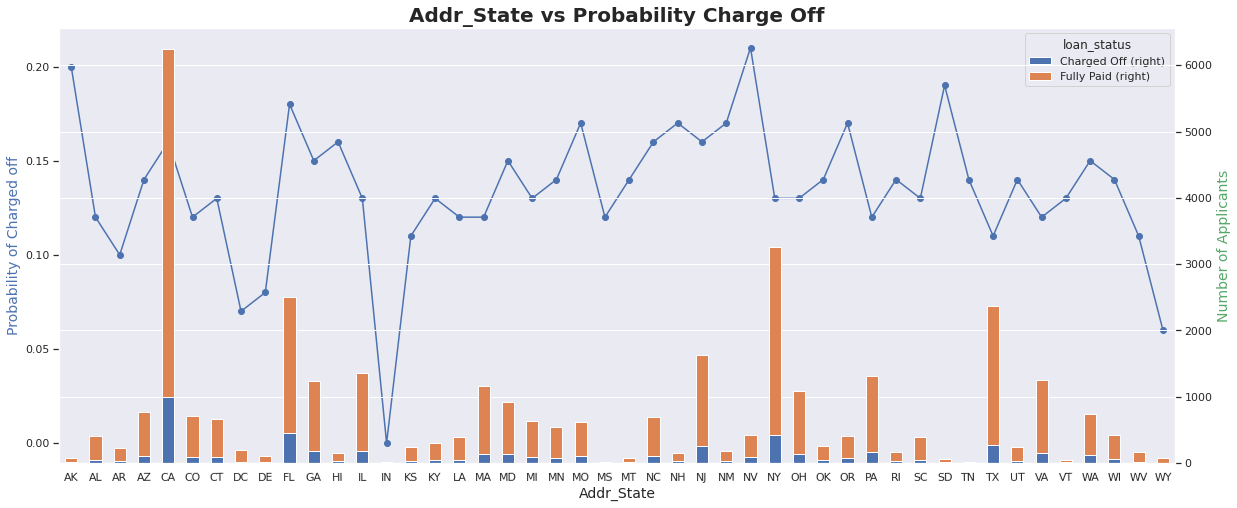

In [192]:
states = crosstab(loan_filter_states,'addr_state')
display(states)

bivariateProbability(loan_filter_states,'addr_state')

In [193]:
#Purpose of Loan vs Probability Charge Off

loan_status,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days),All,Probability_Charged Off
purpose,,,,,,,,,,,
car,159,15,0,13,49,1371,0,0,0,1607,0.10
credit_card,539,58,1,66,263,4487,0,0,2,5416,0.11
debt_consolidation,2765,282,0,284,787,15433,13,2,6,19572,0.15
educational,56,0,0,31,64,265,0,0,0,416,0.17
home_improvement,341,32,0,69,136,2526,1,1,2,3108,0.12
house,58,9,0,10,32,304,1,0,0,414,0.16
major_purchase,220,4,0,23,97,1937,0,0,0,2281,0.10
medical,106,5,0,20,33,574,0,0,0,738,0.16
moving,90,1,0,15,29,485,0,0,0,620,0.16


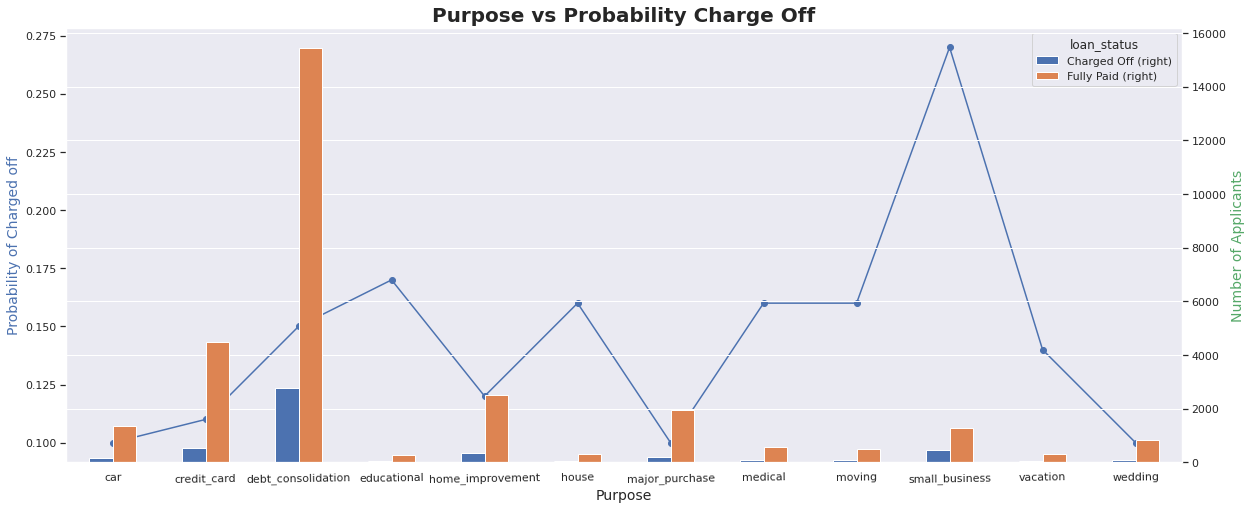

In [194]:
purpose = crosstab(loan_df,'purpose')
display(purpose)

bivariateProbability(loan_df,'purpose',False)

grade/Subgrade vs Probability Charge Off

In [196]:
grade = crosstab(loan_df,'grade')
display(grade)



loan_status,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days),All,Probability_Charged Off
grade,,,,,,,,,,,
A,511,16,0,7,59,8361,0,1,0,8955,0.06
B,1246,127,0,67,203,9292,1,2,3,10941,0.12
C,1172,114,0,121,387,5869,2,0,2,7667,0.17
D,993,94,0,154,420,3653,2,1,1,5318,0.21
E,646,61,1,129,321,1853,8,0,3,3022,0.26
F,293,30,0,80,134,619,1,0,2,1159,0.32
G,89,6,0,57,103,189,1,0,0,445,0.32
All,4950,448,1,615,1627,29836,15,4,11,37507,0.14


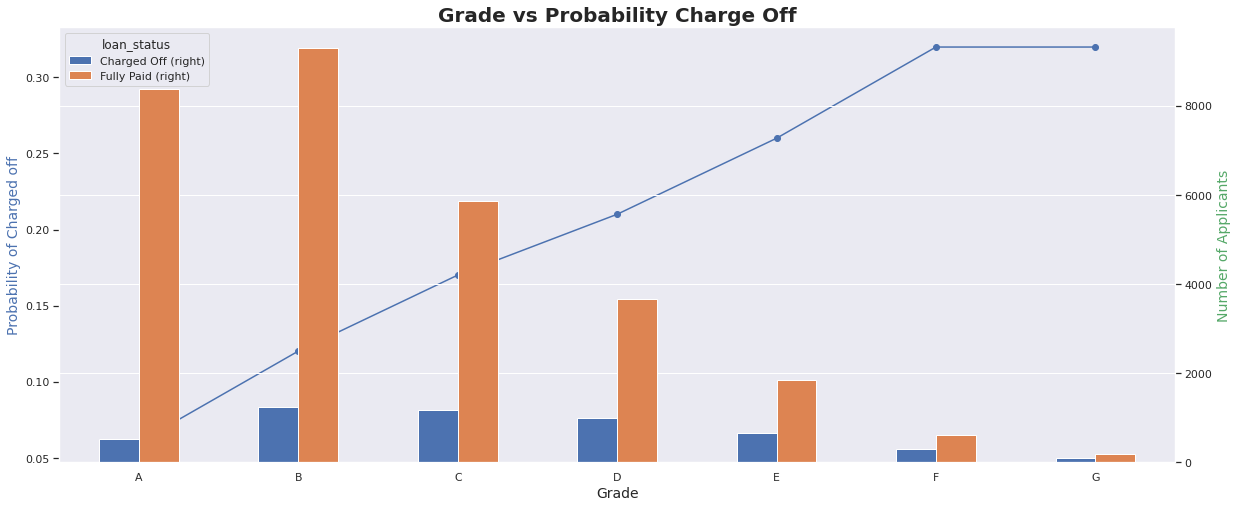

In [197]:
bivariateProbability(loan_df, 'grade', False)

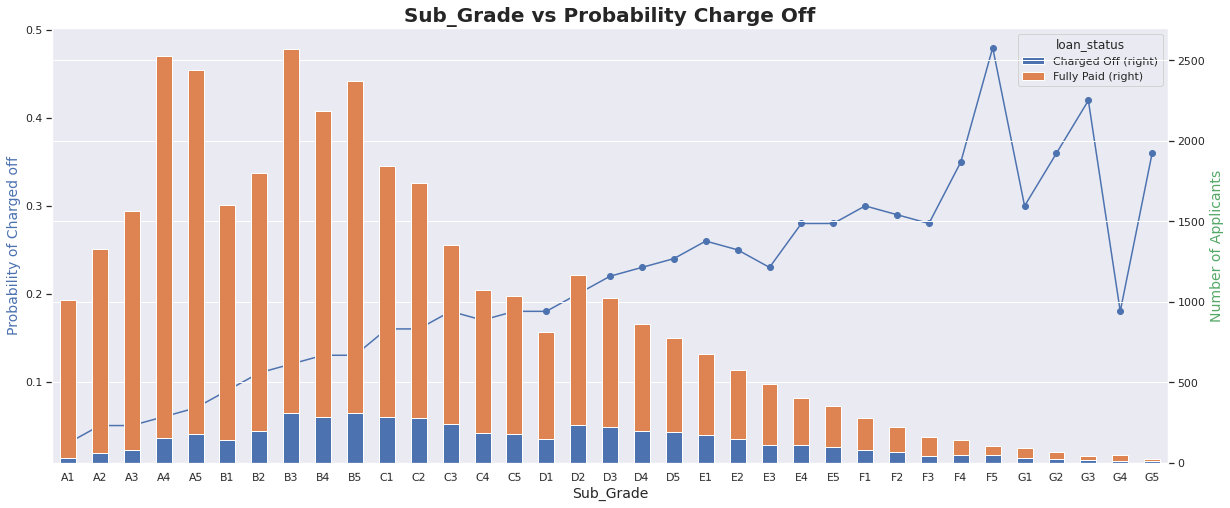

In [198]:
bivariateProbability(loan_df, 'sub_grade')

**Annual Income Range vs Probability Charge Off**

loan_status,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days),All,Probability_Charged Off
annual_inc_range,,,,,,,,,,,
0-25000,386,6,0,62,169,1719,0,0,0,2342,0.18
25000-50000,1873,131,0,217,522,9688,5,2,2,12440,0.16
50000-75000,1527,142,1,175,424,9221,7,1,2,11500,0.14
75000-100000,674,89,0,85,277,4926,1,0,3,6055,0.12
100000 and above,490,80,0,76,235,4282,2,1,4,5170,0.10
All,4950,448,1,615,1627,29836,15,4,11,37507,0.14


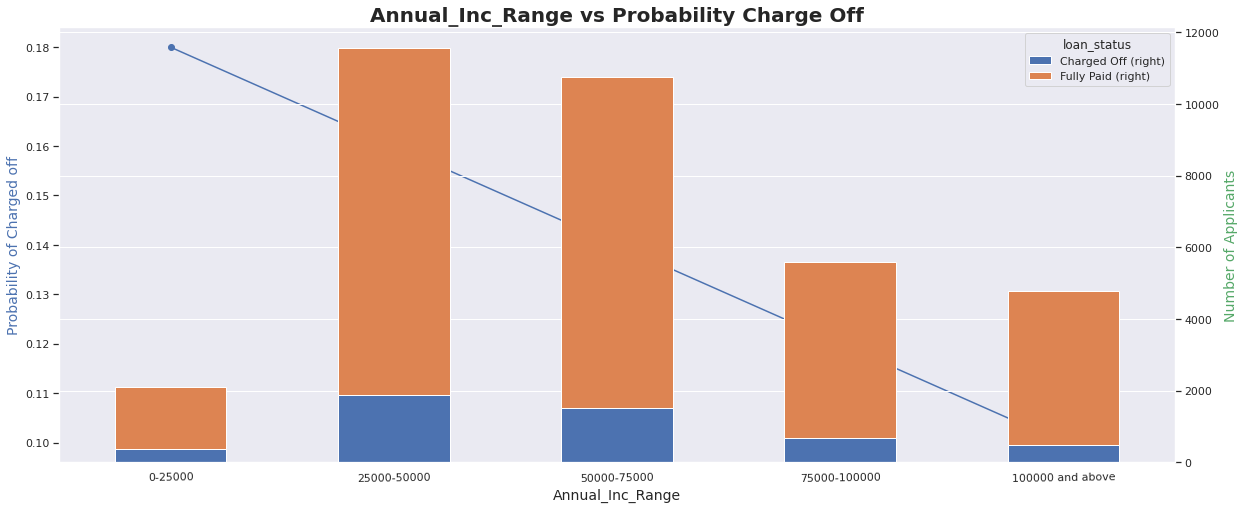

In [199]:
annual_inc_range = crosstab(loan_df,'annual_inc_range')
display(annual_inc_range)

bivariateProbability(loan_df,'annual_inc_range')

In [200]:
# Interest rate Range vs Probability Charge Off

loan_status,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days),All,Probability_Charged Off
int_rate_range,,,,,,,,,,,
0-7.5,224,0,0,2,12,4572,0,0,0,4810,0.05
7.5-10,478,30,0,25,101,5660,0,2,0,6296,0.08
10-12.5,1089,87,0,100,268,7362,0,1,3,8910,0.13
12.5-15,1291,117,0,219,664,6662,3,0,0,8956,0.16
15 and above,1599,169,1,252,551,5114,10,1,6,7703,0.24
All,4681,403,1,598,1596,29370,13,4,9,36675,0.14


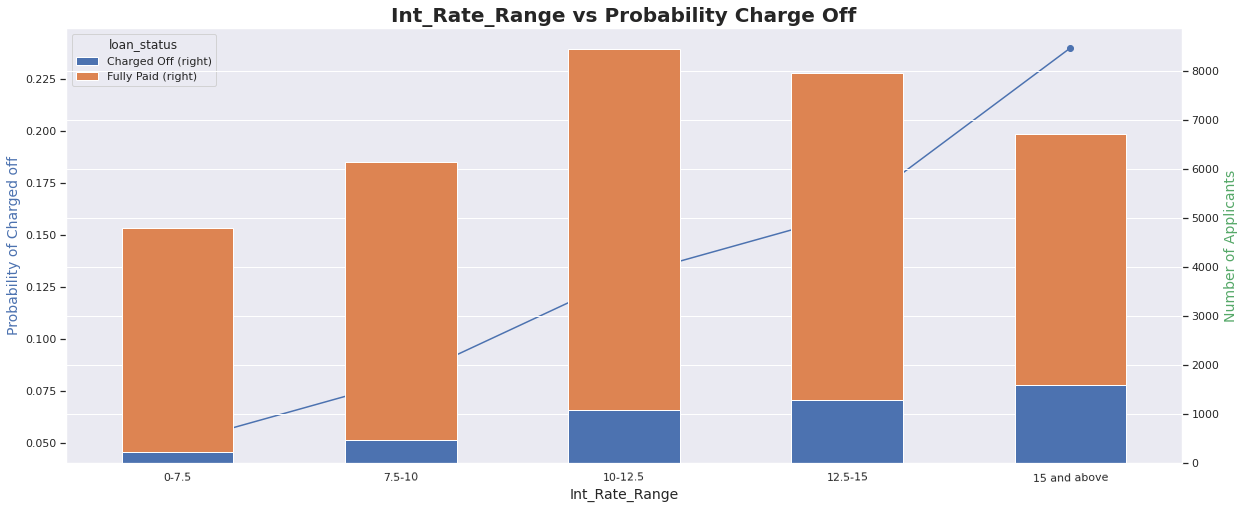

In [201]:
int_rate_range = crosstab(loan_df,'int_rate_range')
display(int_rate_range)

bivariateProbability(loan_df,'int_rate_range')

In [202]:
#Employment Length vs Probability Charge Off

loan_status,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days),All,Probability_Charged Off
emp_length,,,,,,,,,,,
0,191,16,0,14,15,696,0,1,0,933,0.22
< 1 year,561,24,0,89,292,3429,3,0,0,4398,0.14
1 year,396,26,1,73,215,2414,0,0,1,3126,0.14
2 years,484,37,0,71,210,3362,0,1,2,4167,0.13
3 years,485,35,0,57,166,3134,1,1,0,3879,0.13
4 years,405,40,0,50,121,2633,3,1,1,3254,0.13
5 years,413,29,0,42,106,2502,0,0,0,3092,0.14
6 years,277,25,0,33,80,1710,1,0,0,2126,0.14
7 years,232,26,0,25,55,1322,1,0,0,1661,0.15


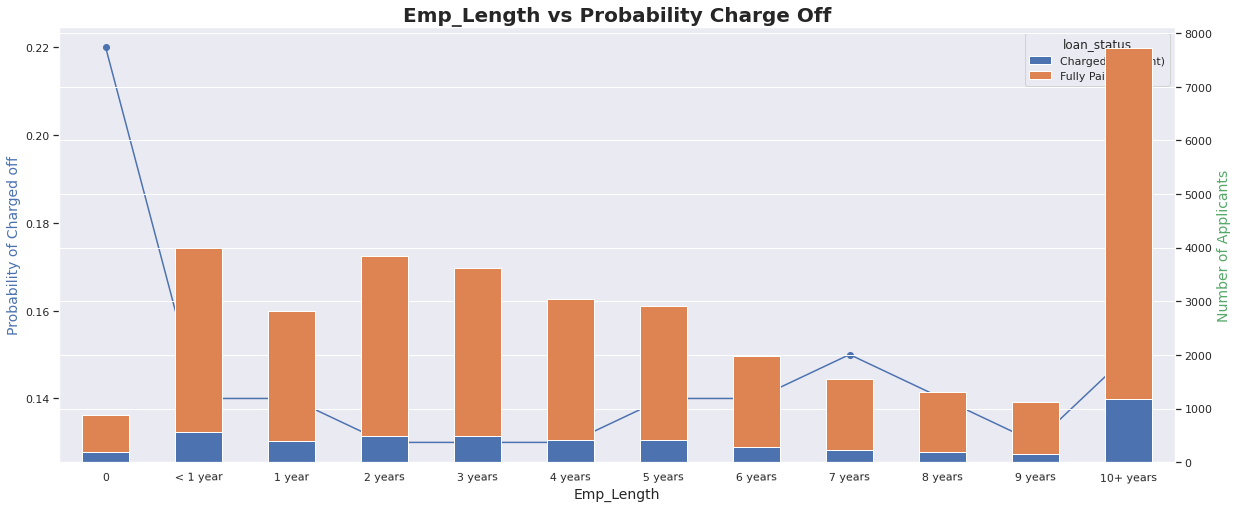

In [203]:
emp_length = crosstab(loan_df,'emp_length')
display(emp_length)

bivariateProbability(loan_df,'emp_length')